**CUSTOMER SEGMENTATION**

- Customer segmentation is a critical task for understanding and catering to different customer needs and preferences

In [ ]:
# Customer segmentation is a critical task for understanding and catering to different customer needs and preferences

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
#import optuna
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA


# Initialize the H2O cluster
#h2o.init()

In [ ]:
# Load the dataset, try a different encoding
data = pd.read_csv(r'/content/RAW DATASET for Sterling E-Commerce Data--.csv', encoding='latin-1') # Try 'latin-1' encoding

In [ ]:
data.head(10)  # Display the first 15 rows of the dataset

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9
5,Men's Fashion,Francesville,Pulaski,112235,1/3/2013,8/6/2022 0:00,"Shofner, Siobhan",F,880700,100547805.0,Payaxis,Francesville,907195,Midwest,IN,shshofner,47946,2,99.9
6,Mobiles & Tablets,Francesville,Pulaski,112235,1/3/2013,8/6/2022 0:00,"Shofner, Siobhan",F,880695,100547801.0,Payaxis,Francesville,907195,Midwest,IN,shshofner,47946,2,8180.0
7,Mobiles & Tablets,Francesville,Pulaski,112235,1/3/2013,8/7/2022 0:00,"Shofner, Siobhan",F,880993,100548009.0,Payaxis,Francesville,907195,Midwest,IN,shshofner,47946,2,8180.0
8,Mobiles & Tablets,Francesville,Pulaski,112235,1/3/2013,8/14/2022 0:00,"Shofner, Siobhan",F,884389,100550076.0,Payaxis,Francesville,907195,Midwest,IN,shshofner,47946,2,1396.0
9,Mobiles & Tablets,Francesville,Pulaski,112235,1/3/2013,8/14/2022 0:00,"Shofner, Siobhan",F,884393,100550079.0,Payaxis,Francesville,907195,Midwest,IN,shshofner,47946,2,1396.0


In [ ]:
data.info()  # Get information about the dataset

In [ ]:
data.describe()  # Get summary statistics of the dataset

In [ ]:
# Use H2O's method for checking missing values
#from h2o.frame import H2OFrame
# check missing values
#data.isna().sum()

# investigate the missing data
data.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [ ]:
 # Drop missing values using H2O's na_omit method
#data = data.na_omit()

data.dropna(inplace=True)  # Drop missing values

In [ ]:
#data.isna().sum()  # Confirm missing values are dropped
data.isnull().sum()  # Confirm missing values are dropped

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [ ]:
# Convert the H2OFrame to a Pandas DataFrame
#data_pandas = data.as_data_frame()

# Now you can use the duplicated method
#data_pandas.duplicated().sum()


data.duplicated().sum()

0

In [ ]:
df = data.copy()
df.head(5)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [ ]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

from scipy.linalg import LinAlgError

In [ ]:
# Data preprocessing
df['Customer Since'] = pd.to_datetime(df['Customer Since'])
df['Date of Order'] = pd.to_datetime(df['Date of Order'])

In [ ]:
# Handling missing values if any
df.fillna(method='ffill', inplace=True)

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = ['Category', 'City', 'County', 'Gender','User Name','Full Name', 'Payment Method', 'Place Name', 'Region', 'State']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

**Creates new features **

- Total Spending per Customer: Total amount spent by each customer.
- Average Order Value per Customer: Average amount spent per order by each customer.
- Total Quantity Ordered per Customer: Total quantity of items ordered by each customer.
- Number of Orders per Customer: Total number of orders placed by each customer.
- Customer Lifetime: Number of days between the first order and the last order of each customer.
- Repeat Purchase Rate: Average number of orders per day during the customer's lifetime.
- Days Since Last Order: Number of days since the customer's last order.

In [ ]:
# Feature Engineering
# Total Spending per Customer
df['Total Spending'] = df.groupby('Cust Id')['Total'].transform('sum')

# Average Order Value per Customer
df['Average Order Value'] = df.groupby('Cust Id')['Total'].transform('mean')

# Total Quantity Ordered per Customer
df['Total Quantity Ordered'] = df.groupby('Cust Id')['Qty Ordered'].transform('sum')

# Number of Orders per Customer
df['Number of Orders'] = df.groupby('Cust Id')['Order Id'].transform('count')

# Customer Lifetime (days)
df['Customer Lifetime'] = (df['Date of Order'] - df['Customer Since']).dt.days

# Repeat Purchase Rate (Number of Orders / Customer Lifetime)
df['Repeat Purchase Rate'] = df['Number of Orders'] / df['Customer Lifetime']

# Days Since Last Order
df['Days Since Last Order'] = df.groupby('Cust Id')['Date of Order'].transform(lambda x: (x.max() - x).dt.days)

In [ ]:
# Selecting features for clustering
features = ['Total Spending', 'Average Order Value', 'Total Quantity Ordered',
            'Number of Orders', 'Customer Lifetime', 'Repeat Purchase Rate', 'Days Since Last Order']

In [ ]:
# Aggregating features at customer level
customer_df = df.groupby('Cust Id').agg({
    'Total Spending': 'mean',
    'Average Order Value': 'mean',
    'Total Quantity Ordered': 'mean',
    'Number of Orders': 'mean',
    'Customer Lifetime': 'mean',
    'Repeat Purchase Rate': 'mean',
    'Days Since Last Order': 'mean'
}).reset_index()

In [ ]:
customer_df


,Cust Id,Total Spending,Average Order Value,Total Quantity Ordered,Number of Orders,Customer Lifetime,Repeat Purchase Rate,Days Since Last Order
0,4,27394.190,668.150976,82.0,41.0,4454.121951,0.009211,196.878049
1,15,216.800,36.133333,13.0,6.0,4002.000000,0.001500,58.000000
2,16,11868.899,593.444950,38.0,20.0,9527.700000,0.002099,6.300000
3,20,28719.018,2610.819818,22.0,11.0,4939.545455,0.002227,127.454545
4,21,105.000,105.000000,6.0,1.0,4271.000000,0.000234,0.000000
...,...,...,...,...,...,...,...,...
63641,115322,209.600,104.800000,4.0,2.0,4688.000000,0.000427,0.000000
63642,115323,4419.900,4419.900000,2.0,1.0,5672.000000,0.000176,0.000000
63643,115324,39.900,39.900000,2.0,1.0,3994.000000,0.000250,0.000000
63644,115325,89.900,44.950000,4.0,2.0,12851.000000,0.000156,0.000000


In [ ]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[features])

# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

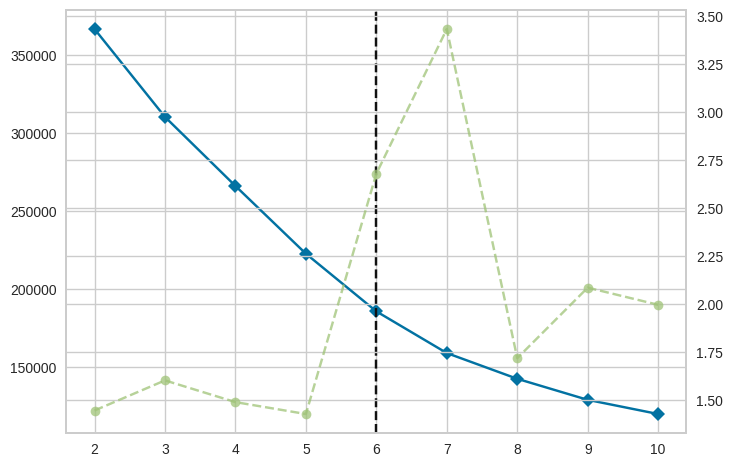

In [ ]:
#clustering section
#using the k elbow visualizer method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(scaled_features)

In [ ]:
# Applying K-means to the dataset
optimal_clusters = 6  # Select the optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
# Analyzing the clusters
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}")
    print(customer_df[customer_df['Cluster'] == cluster].describe())

Cluster 0
             Cust Id  Total Spending  Average Order Value  \
count   17383.000000    17383.000000         17383.000000   
mean    81091.880515     1765.847665           546.832684   
std     24775.869837     3756.233765           777.710429   
min        16.000000        0.000000             0.000000   
25%     68366.500000      115.000000            71.003000   
50%     84451.000000      374.200000           176.566667   
75%    100025.000000     1652.924000           692.550000   
max    115325.000000    96523.640000          4990.000000   

       Total Quantity Ordered  Number of Orders  Customer Lifetime  \
count            17383.000000      17383.000000       17383.000000   
mean                 8.433527          3.087902        9356.289553   
std                 14.470497          3.698632        2182.813413   
min                  1.000000          1.000000        6305.500000   
25%                  2.000000          1.000000        7530.166667   
50%                 

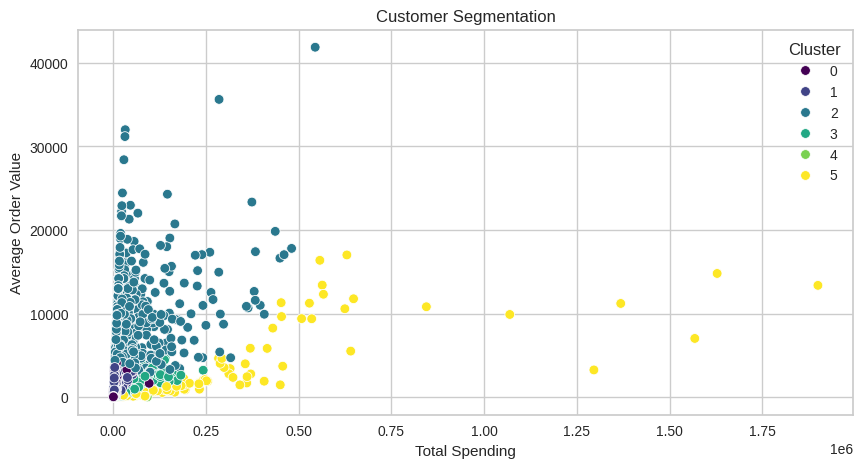

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_df['Total Spending'], y=customer_df['Average Order Value'], hue=customer_df['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Analyzing the clusters
cluster_summary = customer_df.groupby('Cluster')[features].mean()

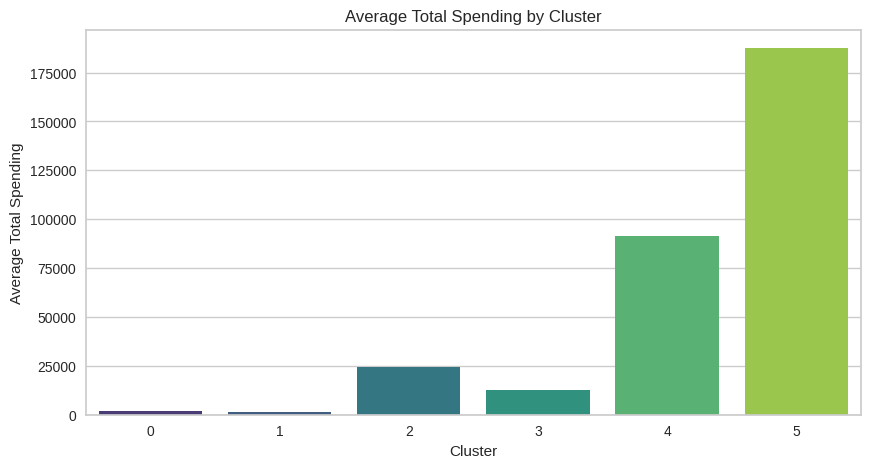

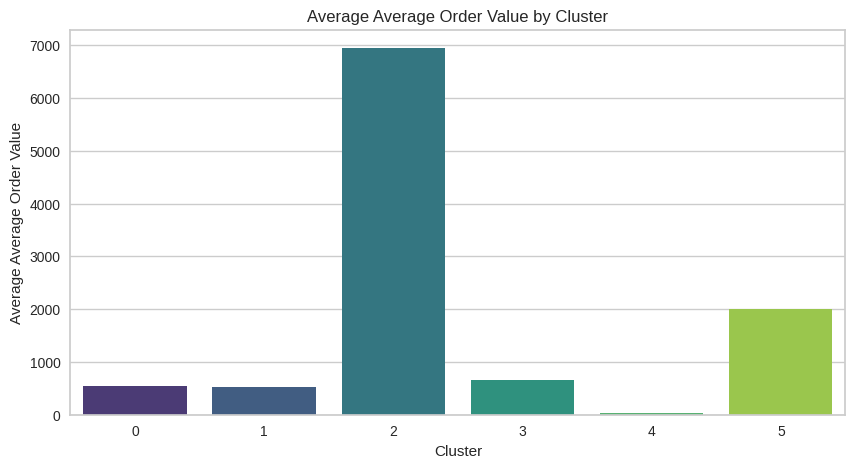

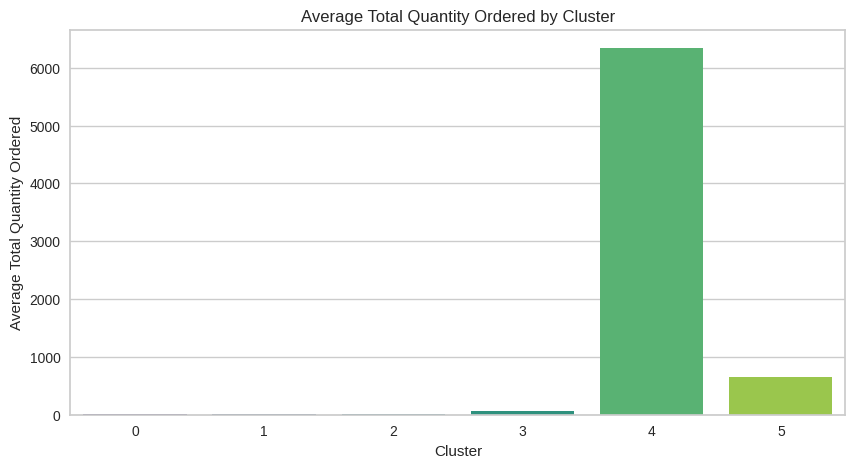

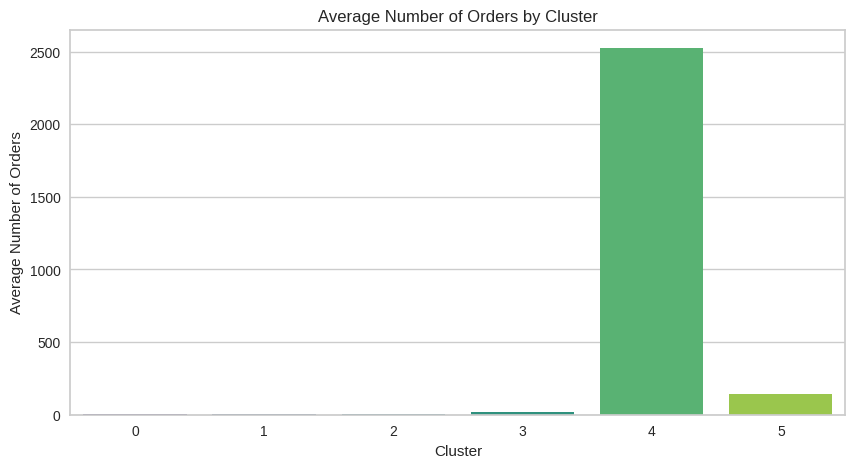

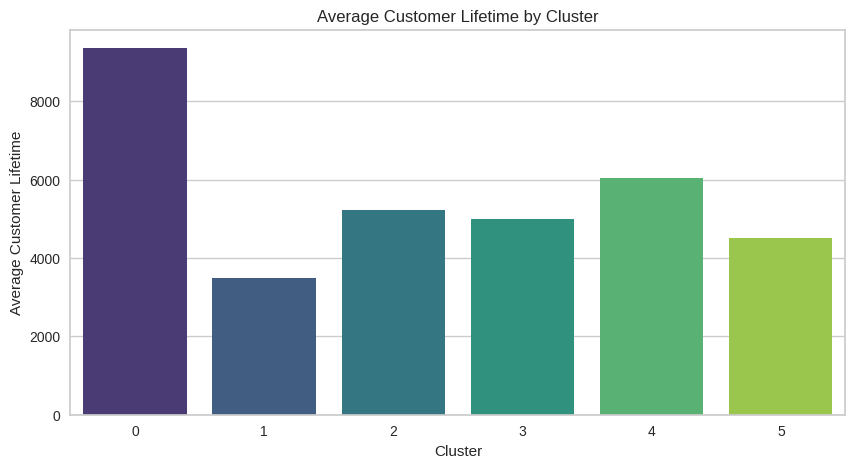

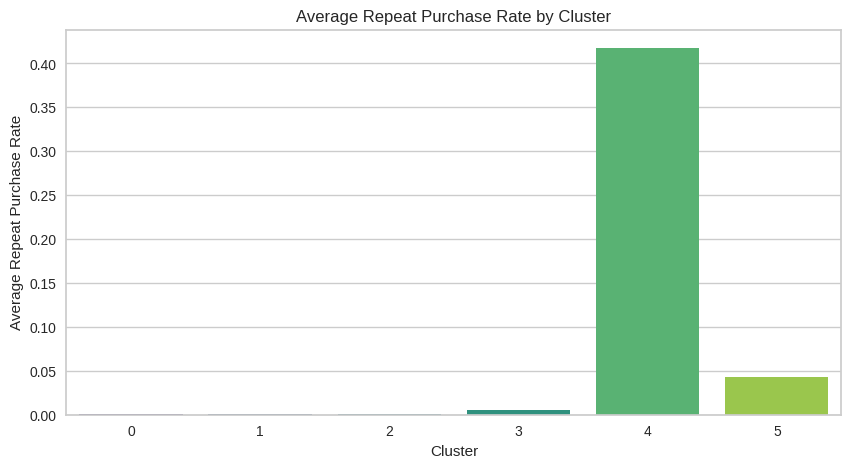

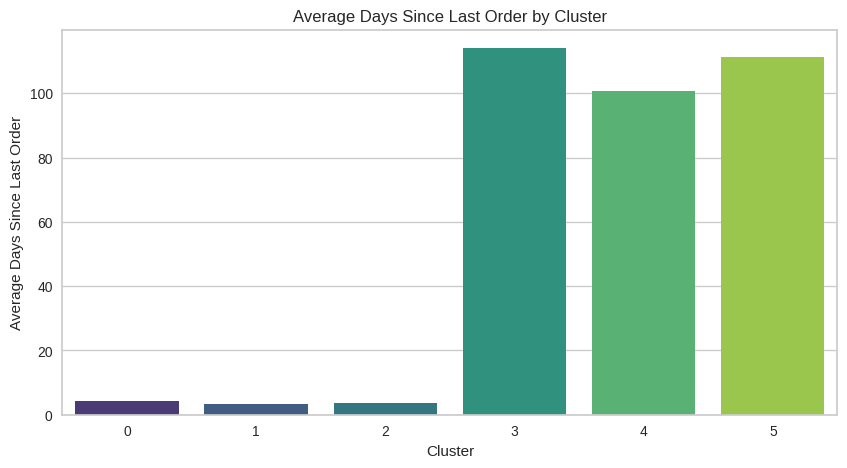

In [ ]:
# Visualizing the clusters with bar charts
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], palette='viridis')
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.show()

In [ ]:
# 3D PCA plot
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)

In [ ]:
customer_df['pca-one'] = pca_result[:,0]
customer_df['pca-two'] = pca_result[:,1]
customer_df['pca-three'] = pca_result[:,2]

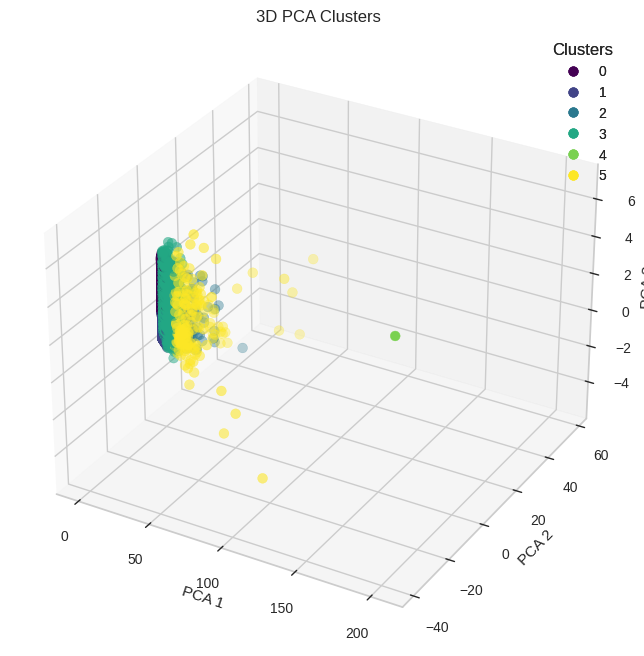

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(customer_df['pca-one'], customer_df['pca-two'], customer_df['pca-three'],
                     c=customer_df['Cluster'], cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.set_title('3D PCA Clusters')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

To evaluate the quality of the clustering, you can calculate the silhouette score. The silhouette score provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates that the samples are well-clustered.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
import matplotlib.pyplot as plt

1. Silhouette Score
Definition: Measures how similar a data point is to its own cluster compared to other clusters.
Range: -1 to 1 (a higher value indicates better-defined clusters).
Use: Provides insight into the separation and cohesion of clusters.
2. Davies-Bouldin Index
Definition: Measures the average similarity ratio of each cluster with its most similar cluster, where lower values indicate better clustering.
Range: 0 to ∞ (lower values are better).
Use: Evaluates the average similarity between clusters.
3. Dunn Index
Definition: Measures the ratio of the smallest inter-cluster distance to the largest intra-cluster distance, with higher values indicating better clustering.
Range: 0 to ∞ (higher values are better).
Use: Helps in assessing the compactness and separation of clusters.
4. Within-Cluster Sum of Squares (WCSS)
Definition: Measures the total distance between each point in a cluster and the centroid of that cluster.
Use: Helps to understand the compactness of clusters; lower values indicate tighter clusters.
5. Between-Cluster Sum of Squares (BCSS)
Definition: Measures the variance between clusters.
Use: Helps to evaluate the separation between clusters; higher values indicate better separation.
6. Cluster Size
Definition: The number of data points in each cluster.
Use: Ensures that clusters are not too small or too large, which can indicate a problem with the clustering result.
7. Inertia (Within-Cluster Sum of Squares)
Definition: The sum of squared distances of samples to their closest cluster center.
Use: Helps to measure the goodness of fit of the model; lower values indicate better fit.
8. Elbow Method
Definition: Plots the WCSS against the number of clusters and looks for an "elbow" point where adding more clusters yields diminishing returns.
Use: Helps to determine the optimal number of clusters.
9. Cluster Profiling
Definition: Analyzing the characteristics of each cluster, such as average spending, frequency of purchases, and demographic details.
Use: Provides actionable insights into the behavior and preferences of different customer segments.
10. Homogeneity and Completeness
Homogeneity: Measures how many samples in a cluster belong to the same class.
Completeness: Measures how well all samples of a class are assigned to the same cluster.
Use: Helps evaluate the quality of clusters in terms of class consistency

In [ ]:
# 1 Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, customer_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.438


In [ ]:
# Compute the first 10 metrics for customer segmentation
# 2. Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.7982624746072391


In [ ]:
# 3. Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scaled_features, customer_df['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index}')

Calinski-Harabasz Index: 17795.894828453387


In [ ]:
# 4. Inertia (Within-cluster Sum of Squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 185775.91605205333


In [ ]:
# 7. Cluster Size
cluster_sizes = pd.Series(customer_df['Cluster']).value_counts()
print('Cluster Sizes:\n', cluster_sizes)

Cluster Sizes:
 Cluster
1    39881
0    17383
3     4034
2     2173
5      174
4        1
Name: count, dtype: int64


Cluster Centroids:
 [[-8.64830383e-02 -1.39141365e-01 -8.57819710e-02 -9.18004758e-02
   1.30489067e+00 -2.07645811e-01 -2.07010283e-01]
 [-9.40011475e-02 -1.57914670e-01 -9.20246267e-02 -1.00219484e-01
  -5.58667012e-01 -4.98820233e-02 -2.35971057e-01]
 [ 9.73101187e-01  4.07066858e+00 -7.08922747e-02 -5.85527844e-02
  -1.08456728e-02 -6.64228939e-02 -2.24091632e-01]
 [ 4.08084786e-01 -7.03856411e-02  8.16458477e-01  9.78480417e-01
  -8.37477817e-02  9.53005916e-01  3.21005590e+00]
 [ 4.07199615e+00 -4.75034691e-01  1.09710958e+02  1.70104370e+02
   2.52009980e-01  1.02542233e+02  2.79152105e+00]
 [ 8.52968810e+00  8.19943832e-01  1.09877554e+01  9.20945498e+00
  -2.37592553e-01  1.03224875e+01  3.12648788e+00]]


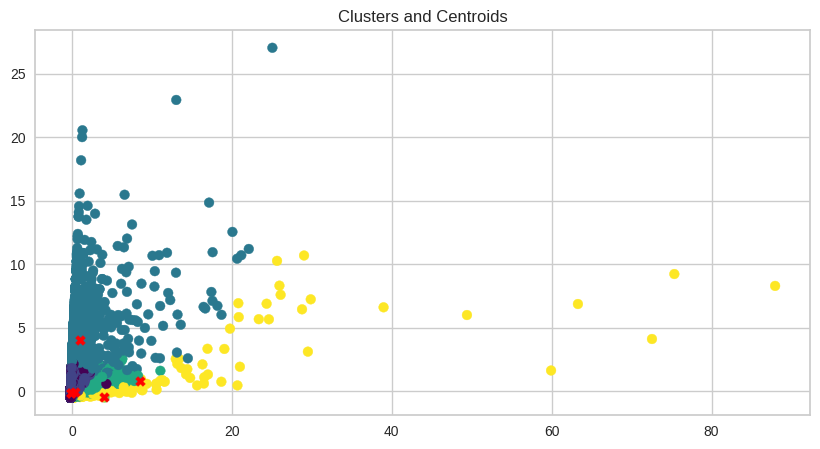

In [ ]:
# 8. Cluster Centroids and Distribution
centroids = kmeans.cluster_centers_
print('Cluster Centroids:\n', centroids)

plt.figure(figsize=(10, 5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title('Clusters and Centroids')
plt.show()

In [ ]:
# 9. Silhouette Plot
!pip install scikit-learn
from sklearn.metrics import silhouette_samples

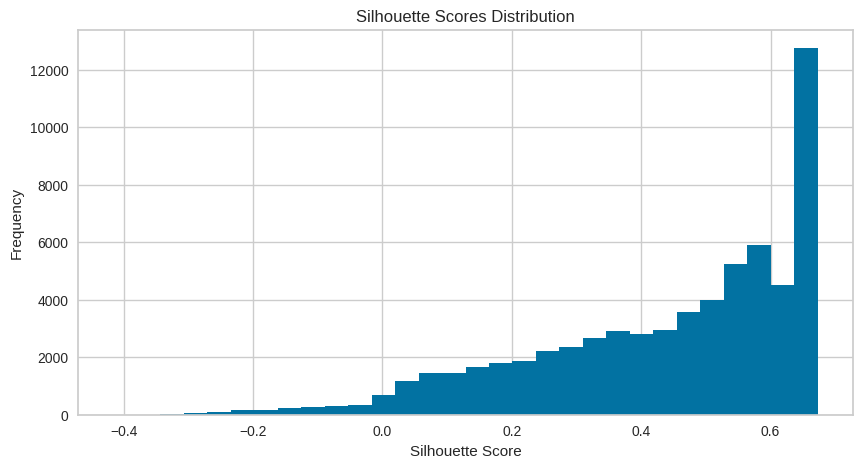

In [ ]:
# 9. Silhouette Plot
silhouette_vals = silhouette_samples(scaled_features, customer_df['Cluster'])
plt.figure(figsize=(10, 5))
plt.hist(silhouette_vals, bins=30)
plt.title('Silhouette Scores Distribution')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 10. Pairwise Distance Metrics
from sklearn.metrics import pairwise_distances # Import the necessary function
distances = pairwise_distances(scaled_features, metric='euclidean')
print('Pairwise Distances:\n', distances)